In [1]:
# ! pip install pandas_ta
# ! pip install xgboost tensorflow prophet catboost

In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Função para tratar os dados externos
def preparar_externa(df, nome_coluna):
    # Converte a coluna de data para o formato correto
    df["Data"] = pd.to_datetime(df["Data"], format="%d.%m.%Y")
    df = df.sort_values("Data")
    # Converte os valores que estão com vírgula para float (número decimal)
    df[nome_coluna] = df["Último"].astype(str).str.replace(",", ".").astype(float)
    # Retorna apenas a data e o valor tratado
    df['Var'] = df["Var%"].str.replace('%', '').str.replace(',', '.').astype(float)
    return df

In [4]:
# Ler base de dados
ibovespa = pd.read_csv('Ibovespa_2022_2025.csv', sep = ',')
ibovespa.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
769,22.11.2022,109.037,109.750,110.224,107.867,"15,06M","-0,65%"
770,21.11.2022,109.748,108.868,110.235,107.957,"16,65M","0,81%"
771,18.11.2022,108.870,109.706,111.585,108.512,"18,77M","-0,76%"
772,17.11.2022,109.703,110.241,110.242,107.245,"23,12M","-0,49%"
773,16.11.2022,110.243,113.166,113.473,109.512,"18,35M","-2,58%"


In [5]:
# Carregar os dados do petróleo Brent
petroleo = pd.read_csv('Petroleo_brent_2022_2025.csv', sep = ',')
print(petroleo)
petroleo = preparar_externa(petroleo, "Brent")
petroleo = petroleo[["Data", "Brent"]]
print(petroleo)
petroleo.info()

           Data Último Abertura Máxima Mínima     Vol.    Var%
0    17.12.2025  59,68    59,30  60,74  59,25  346,61K   1,29%
1    16.12.2025  58,92    60,39  60,40  58,72  356,77K  -2,71%
2    15.12.2025  60,56    61,09  61,50  60,13  288,63K  -0,92%
3    12.12.2025  61,12    61,60  61,86  60,81  246,06K  -0,26%
4    11.12.2025  61,28    62,42  62,63  60,77  328,70K  -1,49%
..          ...    ...      ...    ...    ...      ...     ...
792  22.11.2022  88,36    87,76  89,90  87,35  190,85K   1,04%
793  21.11.2022  87,45    87,74  87,98  82,31  354,60K  -0,19%
794  18.11.2022  87,62    90,10  90,63  85,80  379,66K  -2,41%
795  17.11.2022  89,78    92,73  92,91  89,53  313,53K  -3,32%
796  16.11.2022  92,86    94,11  94,79  91,67  257,62K  -1,07%

[797 rows x 7 columns]
          Data  Brent
796 2022-11-16  92.86
795 2022-11-17  89.78
794 2022-11-18  87.62
793 2022-11-21  87.45
792 2022-11-22  88.36
..         ...    ...
4   2025-12-11  61.28
3   2025-12-12  61.12
2   2025-12-15  60.56


In [6]:
# Carregar os dados do dólar (USD/BRL)
dolar = pd.read_csv('Dolar_2022_2025.csv', sep = ',')
print(dolar)
dolar = preparar_externa(dolar, "Dolar")
dolar = dolar[["Data", "Dolar"]]
print(dolar)
dolar.info()

           Data  Último Abertura  Máxima  Mínima     Vol.    Var%
0    17.12.2025  5,5205   5,4683  5,5315  5,4683      NaN   0,20%
1    16.12.2025  5,5093   5,4151  5,5093  5,4148      NaN   1,75%
2    15.12.2025  5,4148   5,4187  5,4262  5,3810      NaN  -0,08%
3    12.12.2025  5,4190   5,4058  5,4265  5,3795      NaN   0,20%
4    11.12.2025  5,4084   5,4718  5,4784  5,3952      NaN  -1,18%
..          ...     ...      ...     ...     ...      ...     ...
801  22.11.2022  5,3586   5,3203  5,4005  5,2794  174,86K   0,73%
802  21.11.2022  5,3200   5,3832  5,3836  5,2976  177,13K  -1,16%
803  18.11.2022  5,3827   5,4236  5,4236  5,3253  156,99K  -0,74%
804  17.11.2022  5,4231   5,4003  5,5307  5,3866  167,68K   0,43%
805  16.11.2022  5,3998   5,3330  5,4057  5,2868  146,98K   1,26%

[806 rows x 7 columns]
          Data   Dolar
805 2022-11-16  5.3998
804 2022-11-17  5.4231
803 2022-11-18  5.3827
802 2022-11-21  5.3200
801 2022-11-22  5.3586
..         ...     ...
4   2025-12-11  5.4084


In [7]:
# Carregar os dados Selic
selic = pd.read_csv('Selic_2022_2025.csv', sep = ',')
print(selic)
selic = preparar_externa(selic, "Selic")
selic = selic[["Data", "Selic"]]
print(selic)
selic.info()

           Data Último Abertura Máxima Mínima     Vol.    Var%
0    17.12.2025  2,580    2,580  2,580  2,580    0,10K   0,00%
1    16.12.2025  2,580    2,540  2,580  2,540   22,60K   0,00%
2    15.12.2025  2,580    2,580  2,580  2,560   11,60K  -0,77%
3    12.12.2025  2,600    2,640  2,640  2,600   11,70K  -2,26%
4    11.12.2025  2,660    2,660  2,660  2,660    0,20K   0,00%
..          ...    ...      ...    ...    ...      ...     ...
742  22.11.2022  2,710    2,729  2,748  2,710  753,92K  -0,71%
743  21.11.2022  2,729    2,748  2,748  2,729    1,23M  -1,40%
744  18.11.2022  2,768    2,806  2,826  2,729    1,76M  -1,38%
745  17.11.2022  2,806    2,787  2,845  2,787  588,38K   0,69%
746  16.11.2022  2,787    2,806  2,826  2,787  435,65K  -0,69%

[747 rows x 7 columns]
          Data  Selic
746 2022-11-16  2.787
745 2022-11-17  2.806
744 2022-11-18  2.768
743 2022-11-21  2.729
742 2022-11-22  2.710
..         ...    ...
4   2025-12-11  2.660
3   2025-12-12  2.600
2   2025-12-15  2.580


In [8]:
# Carregar dados Vale
vale = pd.read_csv("Vale3_2022_2025.csv", sep = ",")
print(vale)
vale = preparar_externa(vale, "Vale")
vale = vale[["Data", "Vale"]]
print(vale)
vale.info()

           Data Último Abertura Máxima Mínima    Vol.    Var%
0    17.12.2025  70,17    69,64  70,77  69,44  29,38M   1,27%
1    16.12.2025  69,29    69,33  70,03  69,26  21,95M   0,38%
2    15.12.2025  69,03    68,65  69,39  68,50  16,84M   0,61%
3    12.12.2025  68,61    67,75  68,98  67,72  36,48M   0,28%
4    11.12.2025  68,42    67,22  68,77  66,96  25,69M   1,32%
..          ...    ...      ...    ...    ...     ...     ...
774  22.11.2022  67,96    67,80  69,08  67,32  27,11M   0,28%
775  21.11.2022  67,77    67,08  68,00  66,38  27,75M  -1,13%
776  18.11.2022  68,55    71,53  71,65  68,43  44,19M  -2,73%
777  17.11.2022  70,47    68,58  70,63  68,47  31,79M   0,80%
778  16.11.2022  69,91    70,66  71,89  69,15  32,94M  -1,04%

[779 rows x 7 columns]
          Data   Vale
778 2022-11-16  69.91
777 2022-11-17  70.47
776 2022-11-18  68.55
775 2022-11-21  67.77
774 2022-11-22  67.96
..         ...    ...
4   2025-12-11  68.42
3   2025-12-12  68.61
2   2025-12-15  69.03
1   2025-12-

In [9]:
# Carregar dados S&P
sp = pd.read_csv("SeP500_2022_2025.csv", sep = ",")
print(sp)
sp['SeP'] = sp['Último'].astype(str).str.replace(".", "" ).str.replace(",", "." ).astype(float)
sp["Data"] = pd.to_datetime(sp['Data'], format = '%d.%m.%Y')
sp = sp.sort_values('Data')
sp = sp[['Data', 'SeP']]
print(sp)
sp.info()

           Data Último Abertura Máxima Mínima    Vol.    Var%
0    17.12.2025  81,00    81,00  81,00  81,00   2,90K  -0,53%
1    16.12.2025  81,43    81,43  84,00  78,50   4,24K  -2,98%
2    15.12.2025  83,93    83,93  84,19  79,00   4,25K   1,63%
3    12.12.2025  82,58    82,58  84,10  78,00   4,67K   5,98%
4    11.12.2025  77,92    77,92  84,48  77,00  10,35K  -0,78%
..          ...    ...      ...    ...    ...     ...     ...
763  22.11.2022  68,54    68,54  70,00  68,50  18,49K   0,03%
764  21.11.2022  68,52    68,52  68,55  68,50  12,62K  -1,61%
765  18.11.2022  69,64    69,64  70,00  68,50  20,48K  -0,74%
766  17.11.2022  70,16    70,16  71,00  69,00   0,66K  -0,30%
767  16.11.2022  70,37    70,37  71,00  68,01   4,24K   0,16%

[768 rows x 7 columns]
          Data    SeP
767 2022-11-16  70.37
766 2022-11-17  70.16
765 2022-11-18  69.64
764 2022-11-21  68.52
763 2022-11-22  68.54
..         ...    ...
4   2025-12-11  77.92
3   2025-12-12  82.58
2   2025-12-15  83.93
1   2025-12-

In [10]:
ibovespa = preparar_externa(ibovespa, "Ibovespa")
# Remover a coluna 'Último' porque ficou igual a Ibovespa
ibovespa = ibovespa.drop(columns=["Último", "Var%"])

print(ibovespa)

          Data  Abertura   Máxima   Mínima    Vol.  Ibovespa   Var
773 2022-11-16   113.166  113.473  109.512  18,35M   110.243 -2.58
772 2022-11-17   110.241  110.242  107.245  23,12M   109.703 -0.49
771 2022-11-18   109.706  111.585  108.512  18,77M   108.870 -0.76
770 2022-11-21   108.868  110.235  107.957  16,65M   109.748  0.81
769 2022-11-22   109.750  110.224  107.867  15,06M   109.037 -0.65
..         ...       ...      ...      ...     ...       ...   ...
4   2025-12-11   159.072  159.850  158.098   7,02B   159.189  0.07
3   2025-12-12   159.189  161.263  159.189   7,67B   160.766  0.99
2   2025-12-15   160.766  163.073  160.766   8,23B   162.482  1.07
1   2025-12-16   162.482  162.482  158.558   9,92B   158.578 -2.40
0   2025-12-17   158.578  158.611  156.351   5,90M   157.079 -0.95

[774 rows x 7 columns]


In [11]:
# ! pip install pandas_ta

In [12]:
# Gerar uma coluna com o valor do MACD e outra com o sinal.
import pandas_ta as ta

# Certificar-se de que os dados estejam ordenados por data
ibovespa = ibovespa.sort_values('Data')

# Calcular o MACD e adiciona ao DataFrame
macd = ta.macd(ibovespa['Ibovespa'])
macd.tail()

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
4,2.102862,-0.448719,2.551581
3,2.105832,-0.356599,2.462431
2,2.221049,-0.193105,2.414155
1,1.974578,-0.351661,2.326239
0,1.639393,-0.549477,2.188870


In [13]:

# Junta as colunas MACD e sinal ao seu DataFrame
ibovespa = pd.concat([ibovespa, macd], axis=1)

# Renomear
ibovespa.rename(columns={'MACD_12_26_9': 'MACD', 'MACDs_12_26_9': 'MACD_Sinal'}, inplace=True)

# Criar uma variável binária indicando se o MACD cruzou acima do sinal (tendência de alta):
ibovespa['MACD_Cruzamento'] = (ibovespa['MACD'] > ibovespa['MACD_Sinal']).astype(int)

ibovespa.head()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,MACD_Cruzamento
773,2022-11-16,113.166,113.473,109.512,"18,35M",110.243,-2.58,NaN,NaN,NaN,0
772,2022-11-17,110.241,110.242,107.245,"23,12M",109.703,-0.49,NaN,NaN,NaN,0
771,2022-11-18,109.706,111.585,108.512,"18,77M",108.870,-0.76,NaN,NaN,NaN,0
770,2022-11-21,108.868,110.235,107.957,"16,65M",109.748,0.81,NaN,NaN,NaN,0
769,2022-11-22,109.750,110.224,107.867,"15,06M",109.037,-0.65,NaN,NaN,NaN,0


In [14]:
# Média Móvel Simples (SMA) de 100 dias
ibovespa['SMA100'] = ta.sma(ibovespa['Ibovespa'], length=100)

# Média Móvel Exponencial (EMA) de 100 dias
ibovespa['EMA100'] = ta.ema(ibovespa['Ibovespa'], length=100)

# O HiLo é um indicador de tendência que compara o preço de fechamento com médias móveis das máximas e mínimas.
# Se o fechamento está acima da média das máximas → tendência de alta.
# Se está abaixo da média das mínimas → tendência de baixa.

# HiLo de 13 períodos (padrão bastante usado)
ibovespa['HiLo_High'] = ibovespa['Máxima'].rolling(window=13).mean()
ibovespa['HiLo_Low']  = ibovespa['Mínima'].rolling(window=13).mean()

# Sinal do HiLo: 1 = alta, -1 = baixa
ibovespa['HiLo_Sinal'] = 0
ibovespa.loc[ibovespa['Ibovespa'] > ibovespa['HiLo_High'], 'HiLo_Sinal'] = 1
ibovespa.loc[ibovespa['Ibovespa'] < ibovespa['HiLo_Low'], 'HiLo_Sinal'] = -1




In [15]:
ibovespa.tail()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,MACD_Cruzamento,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal
4,2025-12-11,159.072,159.850,158.098,"7,02B",159.189,0.07,2.102862,-0.448719,2.551581,0,145.43792,147.781076,160.241000,157.827923,0
3,2025-12-12,159.189,161.263,159.189,"7,67B",160.766,0.99,2.105832,-0.356599,2.462431,0,145.70750,148.038203,160.617154,158.163923,1
2,2025-12-15,160.766,163.073,160.766,"8,23B",162.482,1.07,2.221049,-0.193105,2.414155,0,145.99708,148.324219,160.952462,158.537154,1
1,2025-12-16,162.482,162.482,158.558,"9,92B",158.578,-2.40,1.974578,-0.351661,2.326239,0,146.26157,148.527264,161.230769,158.567231,0
0,2025-12-17,158.578,158.611,156.351,"5,90M",157.079,-0.95,1.639393,-0.549477,2.188870,0,146.50510,148.696605,161.147846,158.434385,-1


In [16]:
# Verificar se existe algum valor na coluna 'Vol.' que não termina com B ou M.

# Filtra valores que não terminam com B nem M
valores_diferentes = ibovespa[~ibovespa['Vol.'].astype(str).str.endswith(('B','M'))]

print(valores_diferentes)

Empty DataFrame
Columns: [Data, Abertura, Máxima, Mínima, Vol., Ibovespa, Var, MACD, MACDh_12_26_9, MACD_Sinal, MACD_Cruzamento, SMA100, EMA100, HiLo_High, HiLo_Low, HiLo_Sinal]
Index: []


In [17]:
# Mudar de vírgula para ponto na coluna Vol.

ibovespa['Vol.'] = (ibovespa["Vol."].astype(str).str.replace(",", ".")
.str.replace("B", "e9")
.str.replace("M", "e6")
.astype(float))
ibovespa.head()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,MACD_Cruzamento,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal
773,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,-2.58,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
772,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,-0.49,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
771,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,-0.76,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
770,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,0.81,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
769,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,-0.65,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [18]:

# Juntar variaveis explicativas em um único DataFrame, usando a data como chave
from functools import reduce

dfs = [ibovespa, petroleo, dolar, selic, sp, vale]  # lista de DataFrames

ibov = reduce(lambda left, right: pd.merge(left, right, on="Data", how="left"), dfs)
ibov.head()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale
0,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,-2.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,92.86,5.3998,2.787,70.37,69.91
1,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,-0.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,89.78,5.4231,2.806,70.16,70.47
2,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,-0.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.62,5.3827,2.768,69.64,68.55
3,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.45,5.3200,2.729,68.52,67.77
4,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,-0.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,88.36,5.3586,2.710,68.54,67.96


In [19]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             774 non-null    datetime64[ns]
 1   Abertura         774 non-null    float64       
 2   Máxima           774 non-null    float64       
 3   Mínima           774 non-null    float64       
 4   Vol.             774 non-null    float64       
 5   Ibovespa         774 non-null    float64       
 6   Var              774 non-null    float64       
 7   MACD             749 non-null    float64       
 8   MACDh_12_26_9    741 non-null    float64       
 9   MACD_Sinal       741 non-null    float64       
 10  MACD_Cruzamento  774 non-null    int64         
 11  SMA100           675 non-null    float64       
 12  EMA100           675 non-null    float64       
 13  HiLo_High        762 non-null    float64       
 14  HiLo_Low         762 non-null    float64  

In [20]:
# Vf quantos registros com ao menos um NA. Melhor remover ou usar media valores vizinhos?
qtd_nan = ibov.isna().any(axis = 1).sum()
print(qtd_nan)

ibov[ibov.isna().any(axis = 1)]

169


,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale
0,2022-11-16,113.166,113.473,109.512,1.835000e+07,110.243,-2.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,92.86,5.3998,2.787,70.37,69.91
1,2022-11-17,110.241,110.242,107.245,2.312000e+07,109.703,-0.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,89.78,5.4231,2.806,70.16,70.47
2,2022-11-18,109.706,111.585,108.512,1.877000e+07,108.870,-0.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.62,5.3827,2.768,69.64,68.55
3,2022-11-21,108.868,110.235,107.957,1.665000e+07,109.748,0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.45,5.3200,2.729,68.52,67.77
4,2022-11-22,109.750,110.224,107.867,1.506000e+07,109.037,-0.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,88.36,5.3586,2.710,68.54,67.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2025-10-28,146.970,147.811,146.575,7.110000e+09,147.429,0.31,0.969725,0.417689,0.552036,...,139.54286,140.074774,144.702385,143.131538,1,64.40,5.3584,2.780,NaN,62.20
739,2025-10-29,147.430,149.067,147.430,8.000000e+09,148.633,0.82,1.185699,0.506930,0.678769,...,139.66483,140.244244,145.224923,143.685308,1,64.92,5.3610,2.760,NaN,63.33
760,2025-11-28,158.358,159.689,158.078,8.020000e+09,159.072,0.45,2.770202,-0.073796,2.843998,...,143.20842,145.429037,157.662154,155.974692,1,63.20,5.3368,NaN,82.99,67.40
765,2025-12-05,164.461,165.036,157.007,1.453000e+10,157.369,-4.31,2.892741,-0.042478,2.935219,...,144.46313,146.878447,159.252846,157.125077,0,63.75,5.4395,NaN,82.19,66.73


In [21]:
ibov.head(24)

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale
0,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,-2.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,92.86,5.3998,2.787,70.37,69.91
1,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,-0.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,89.78,5.4231,2.806,70.16,70.47
2,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,-0.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.62,5.3827,2.768,69.64,68.55
3,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.45,5.3200,2.729,68.52,67.77
4,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,-0.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,88.36,5.3586,2.710,68.54,67.96
5,2022-11-23,109.036,109.285,107.902,13200000.0,108.841,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,85.41,5.3591,2.748,68.50,68.63
6,2022-11-24,108.846,112.612,108.846,10300000.0,111.831,2.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,85.34,5.3208,2.729,69.66,69.07
7,2022-11-25,111.831,112.025,108.552,12310000.0,108.977,-2.55,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.63,5.4098,2.729,70.00,68.60
8,2022-11-28,108.977,109.476,108.378,11490000.0,108.782,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.19,5.3654,2.865,69.87,68.94
9,2022-11-29,108.784,112.187,108.784,14720000.0,110.910,1.96,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.03,5.2695,2.903,68.26,71.61


In [22]:
# Feature Engineering

# Substituir os NAs pela media do valor do atributo nos dias anterior e seguinte

# Para cada coluna, substitui NaN pela média do valor anterior e próximo

colunas = [ 'Selic', 'SeP', 'Brent' ]
for col in colunas:
    ibov[col] = ibov[col].fillna((ibov[col].shift(1) + ibov[col].shift(-1)) / 2)

# Ainda assim sobraram alguns Nas. Resolver com interpolate
ibov[colunas] = ibov[colunas].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

/tmp/ipython-input-3949129310.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ibov[colunas] = ibov[colunas].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


In [23]:
ibov.head(24)

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale
0,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,-2.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,92.86,5.3998,2.7870,70.370,69.91
1,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,-0.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,89.78,5.4231,2.8060,70.160,70.47
2,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,-0.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.62,5.3827,2.7680,69.640,68.55
3,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.45,5.3200,2.7290,68.520,67.77
4,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,-0.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,88.36,5.3586,2.7100,68.540,67.96
5,2022-11-23,109.036,109.285,107.902,13200000.0,108.841,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,85.41,5.3591,2.7480,68.500,68.63
6,2022-11-24,108.846,112.612,108.846,10300000.0,111.831,2.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,85.34,5.3208,2.7290,69.660,69.07
7,2022-11-25,111.831,112.025,108.552,12310000.0,108.977,-2.55,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.63,5.4098,2.7290,70.000,68.60
8,2022-11-28,108.977,109.476,108.378,11490000.0,108.782,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.19,5.3654,2.8650,69.870,68.94
9,2022-11-29,108.784,112.187,108.784,14720000.0,110.910,1.96,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.03,5.2695,2.9030,68.260,71.61


In [24]:
# Criar a coluna alvo 'ibov_alta'

# Se Var > 0 → 1 (alta), senão → 0 (baixa ou neutro)
# ibov['ibov_alta'] = np.where(ibov['Var'] > 0, 1, 0)

# Se fechamento de amanhã > fechamento de hoje → 1, senão 0
ibov["ibov_alta"] = (ibov["Ibovespa"].shift(-1) > ibov["Ibovespa"]).astype(int)

# Agora remover a coluna 'Var' que é gabarito do modelo também
ibov = ibov.drop(columns= ['Var'])

ibov.head()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,MACD,MACDh_12_26_9,MACD_Sinal,MACD_Cruzamento,...,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale,ibov_alta
0,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,NaN,NaN,NaN,0,...,NaN,NaN,NaN,0,92.86,5.3998,2.787,70.37,69.91,0
1,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,NaN,NaN,NaN,0,...,NaN,NaN,NaN,0,89.78,5.4231,2.806,70.16,70.47,0
2,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,NaN,NaN,NaN,0,...,NaN,NaN,NaN,0,87.62,5.3827,2.768,69.64,68.55,1
3,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,NaN,NaN,NaN,0,...,NaN,NaN,NaN,0,87.45,5.3200,2.729,68.52,67.77,0
4,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,NaN,NaN,NaN,0,...,NaN,NaN,NaN,0,88.36,5.3586,2.710,68.54,67.96,0


In [25]:
ibov.describe()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,MACD,MACDh_12_26_9,MACD_Sinal,MACD_Cruzamento,...,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale,ibov_alta
count,774,774.000000,774.000000,774.000000,7.740000e+02,774.000000,749.000000,741.000000,741.000000,774.000000,...,675.000000,762.000000,762.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,2024-06-02 22:38:08.372093184,125.752996,126.631872,124.969332,2.853600e+09,125.809421,0.430820,0.017781,0.429279,0.471576,...,125.496270,126.482498,124.837975,0.060724,77.112565,5.319270,2.727887,77.809044,60.741382,0.510336
min,2022-11-16 00:00:00,97.926000,99.258000,96.997000,4.330000e+06,97.926000,-2.220346,-0.968416,-1.952914,0.000000,...,106.333986,101.876692,99.997769,-1.000000,58.920000,4.724100,2.080000,60.890000,49.200000,0.000000
25%,2023-08-23 06:00:00,117.586250,118.341000,116.688250,9.647500e+06,117.677250,-0.508386,-0.286276,-0.481558,0.000000,...,119.095146,118.286808,116.823000,-1.000000,71.785000,4.989575,2.500000,71.000000,56.317500,0.000000
50%,2024-06-05 12:00:00,126.927000,127.662500,126.071500,1.257500e+07,126.926500,0.252083,-0.014687,0.261712,0.000000,...,126.421066,127.884692,126.307577,0.000000,77.505000,5.318400,2.720000,79.790000,59.075000,1.000000
75%,2025-03-13 18:00:00,133.000250,133.927500,132.243250,7.120000e+09,133.110000,1.398396,0.304351,1.289528,1.000000,...,130.345582,133.367538,131.749846,1.000000,83.360000,5.576125,2.942000,83.470000,63.337500,1.000000
max,2025-12-17 00:00:00,164.461000,165.036000,161.759000,2.487000e+10,164.456000,3.564427,1.039183,3.104695,1.000000,...,148.696605,161.230769,158.567231,1.000000,96.550000,6.289600,3.600000,89.900000,82.650000,1.000000
std,NaN,12.594272,12.579222,12.650004,4.471350e+09,12.636227,1.282783,0.398304,1.197147,0.499514,...,9.209712,12.110885,12.191918,0.858822,8.031345,0.346776,0.313992,6.812395,6.442228,0.500216


In [26]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             774 non-null    datetime64[ns]
 1   Abertura         774 non-null    float64       
 2   Máxima           774 non-null    float64       
 3   Mínima           774 non-null    float64       
 4   Vol.             774 non-null    float64       
 5   Ibovespa         774 non-null    float64       
 6   MACD             749 non-null    float64       
 7   MACDh_12_26_9    741 non-null    float64       
 8   MACD_Sinal       741 non-null    float64       
 9   MACD_Cruzamento  774 non-null    int64         
 10  SMA100           675 non-null    float64       
 11  EMA100           675 non-null    float64       
 12  HiLo_High        762 non-null    float64       
 13  HiLo_Low         762 non-null    float64       
 14  HiLo_Sinal       774 non-null    int64    

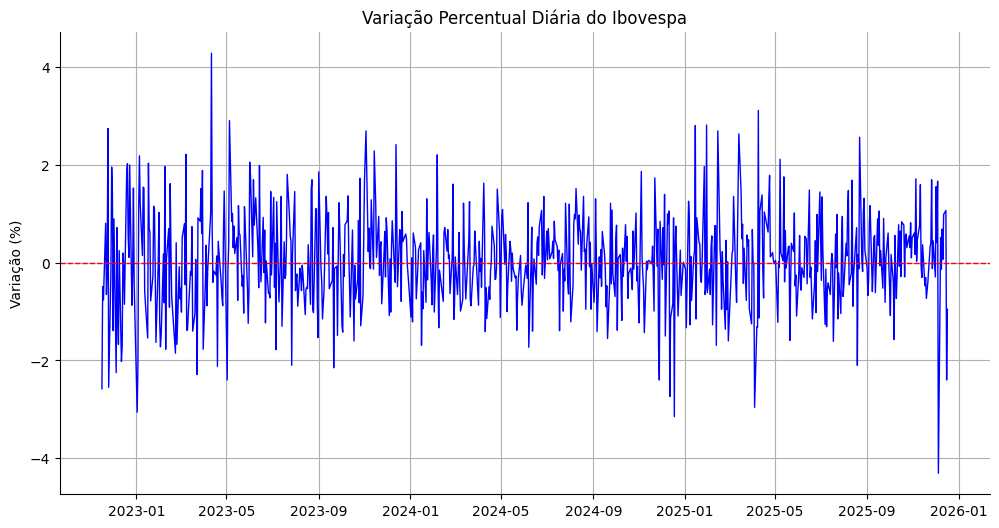

In [27]:
# Gráfico exploratório série temporal

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ibovespa['Data'] = pd.to_datetime(ibovespa['Data'], format='%d.%m.%Y')

# Plotar série temporal da variação percentual
plt.figure(figsize=(12,6))
plt.plot(ibovespa['Data'], ibovespa['Var'], color='blue', linewidth=1)

# Personalizar o gráfico
plt.title('Variação Percentual Diária do Ibovespa')
plt.xlabel('')
plt.ylabel('Variação (%)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # linha de referência no zero
plt.grid(True)
sns.despine(top = True, right = True)
plt.show()

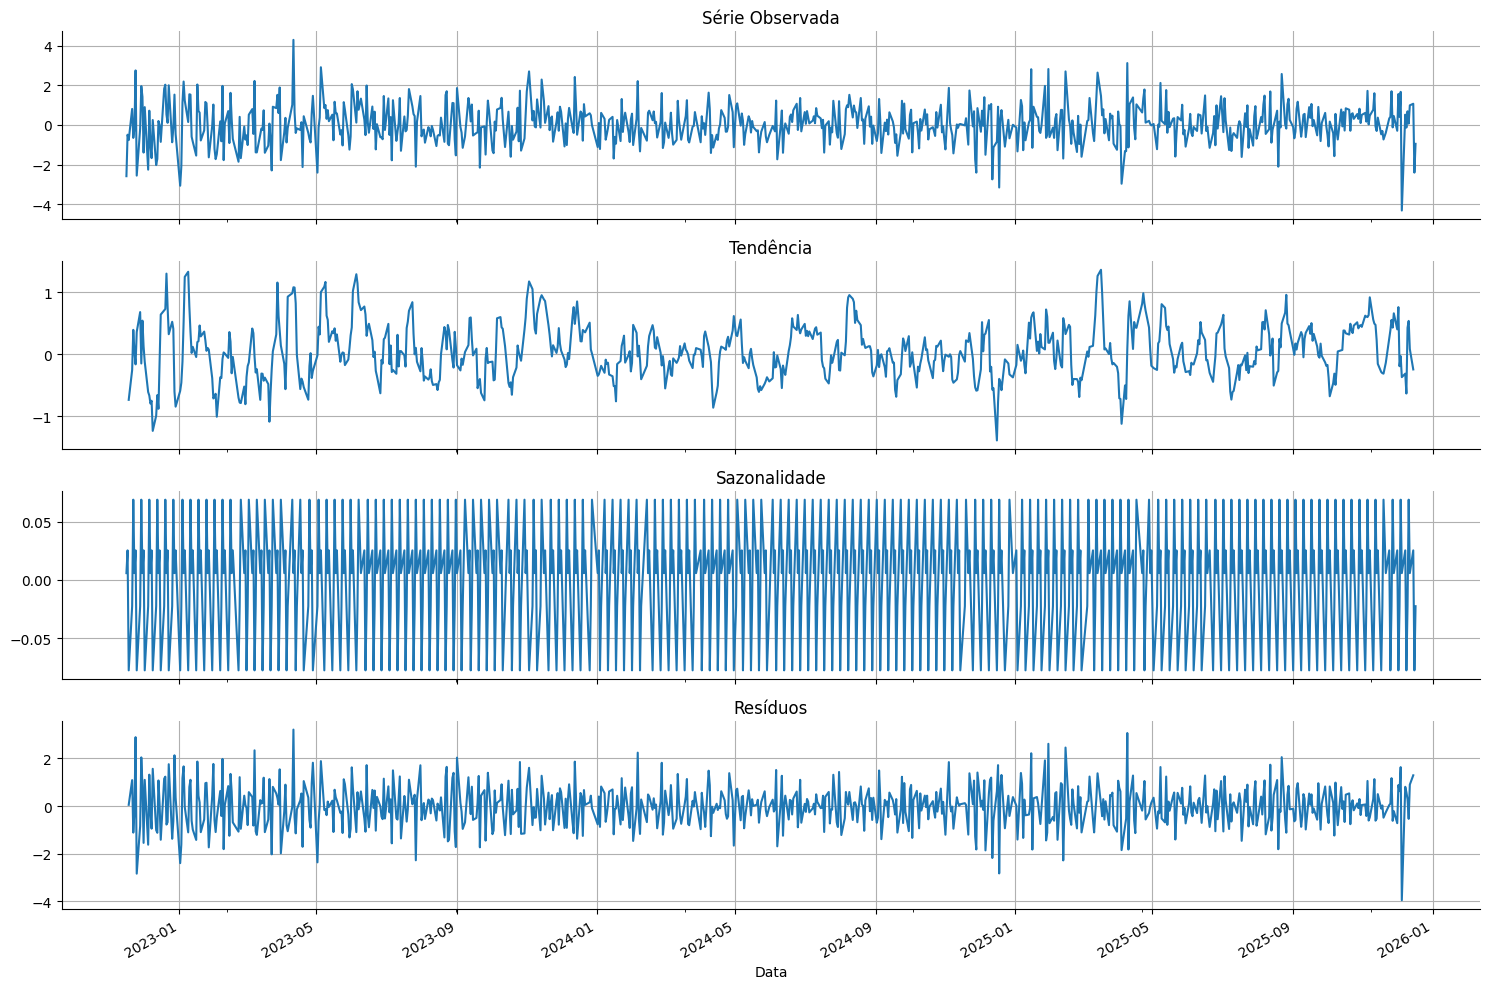

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Garantir que a coluna Data está em datetime
ibovespa['Data'] = pd.to_datetime(ibovespa['Data'], format='%d.%m.%Y')
ibovespa = ibovespa.set_index('Data')

# Decomposição da série temporal
decomp = seasonal_decompose(ibovespa['Var'], model='additive', period=5)

# Plotar os componentes da decomposição
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

decomp.observed.plot(ax=ax1)
ax1.set_title('Série Observada')

decomp.trend.plot(ax=ax2)
ax2.set_title('Tendência')

decomp.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')

decomp.resid.plot(ax=ax4)
ax4.set_title('Resíduos')

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

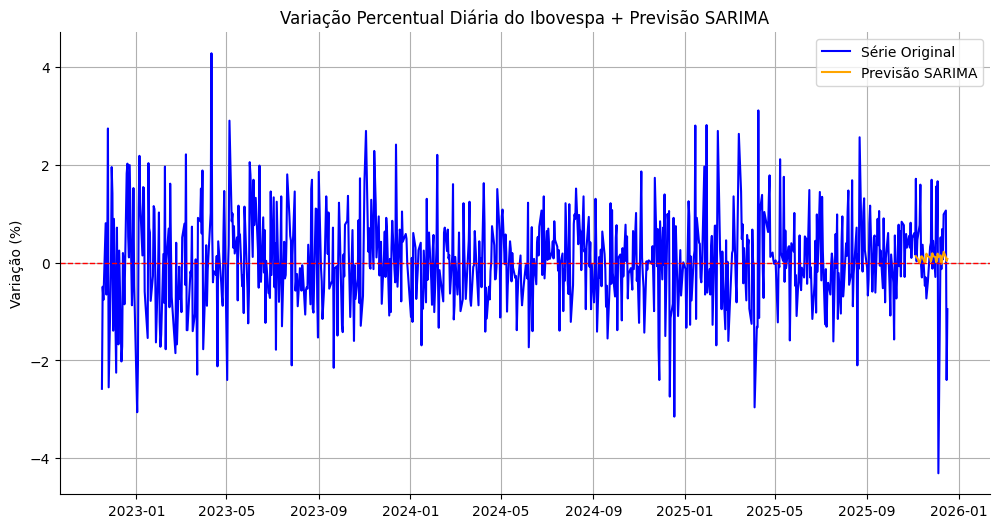

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Garantir que a coluna Data está em datetime
ibovespa['Data'] = pd.to_datetime(ibovespa['Data'], format='%d.%m.%Y')
ibovespa = ibovespa.set_index('Data')

# Ajustar modelo SARIMA simples (parâmetros podem ser otimizados)
model = SARIMAX(ibovespa['Var'], order=(1,1,1), seasonal_order=(1,1,1,5))
results = model.fit(disp=False)

# Fazer previsão para os últimos 30 dias
pred = results.get_prediction(start=-30)
pred_mean = pred.predicted_mean

# Plotar série original + previsão
plt.figure(figsize=(12,6))
plt.plot(ibovespa.index, ibovespa['Var'], color='blue', label='Série Original')
plt.plot(pred_mean.index, pred_mean, color='orange', label='Previsão SARIMA')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Variação Percentual Diária do Ibovespa + Previsão SARIMA')
plt.ylabel('Variação (%)')
plt.legend()
plt.grid(True)
sns.despine(top=True, right=True)
plt.show()

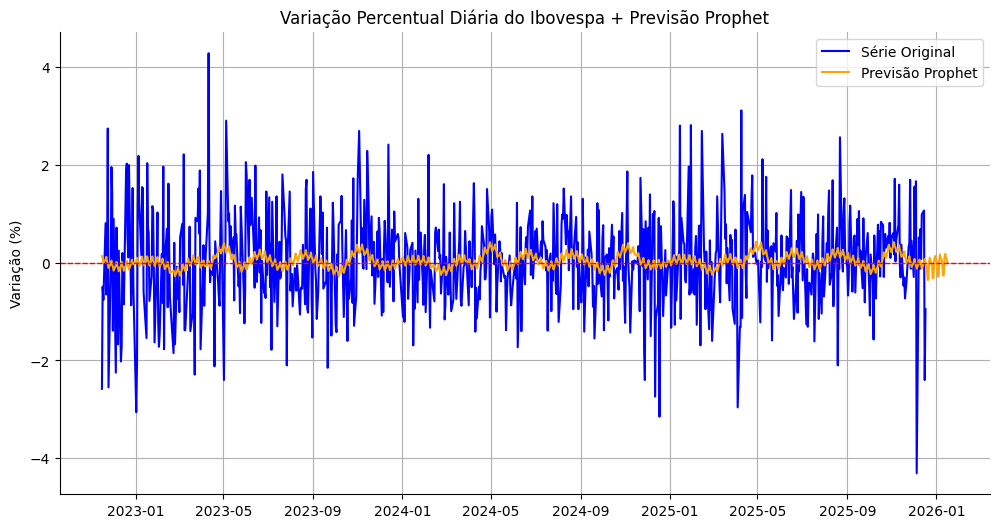

In [ ]:
from prophet import Prophet

# Preparar dados no formato esperado pelo Prophet
df_prophet = ibovespa.reset_index()[['Data','Var']]
df_prophet.columns = ['ds','y']

# Ajustar modelo Prophet
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Criar dataframe futuro para previsão (30 dias à frente)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plotar série original + previsão
plt.figure(figsize=(12,6))
plt.plot(df_prophet['ds'], df_prophet['y'], color='blue', label='Série Original')
plt.plot(forecast['ds'], forecast['yhat'], color='orange', label='Previsão Prophet')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Variação Percentual Diária do Ibovespa + Previsão Prophet')
plt.ylabel('Variação (%)')
plt.legend()
plt.grid(True)
sns.despine(top=True, right=True)
plt.show()

In [ ]:
# 7. Cria novas colunas com informações derivadas (engenharia de atributos)
# Média móvel de 5 e 10 dias do fechamento do Ibovespa
ibov["ma_5"] = ibov["Ibovespa"].rolling(5).mean()
ibov["ma_10"] = ibov["Ibovespa"].rolling(10).mean()


# Retorno diário do Brent e do Dólar
ibov["ret_brent"] = ibov["Brent"].pct_change()
ibov["ret_dolar"] = ibov["Dolar"].pct_change()

# Médias móveis
ibov["ma_brent_5"] = ibov["Brent"].rolling(5).mean()
ibov["ma_brent_10"] = ibov["Brent"].rolling(10).mean()

ibov["ma_dolar_5"] = ibov["Dolar"].rolling(5).mean()
ibov["ma_dolar_10"] = ibov["Dolar"].rolling(10).mean()

ibov["ma_vale_5"] = ibov["Vale"].rolling(5).mean()
ibov["ma_vale_10"] = ibov["Vale"].rolling(10).mean()

ibov["ma_sep_5"] = ibov["SeP"].rolling(5).mean()
ibov["ma_sep_10"] = ibov["SeP"].rolling(10).mean()

# Retornos diários. Para variáveis que representam preços de ativos ou índices:
ibov["ret_vale"] = ibov["Vale"].pct_change()
ibov["ret_sep"] = ibov["SeP"].pct_change()

# Risco: Volatilidade móvel (desvio padrão dos retornos em janelas):


ibov["vol_brent_5"] = ibov["ret_brent"].rolling(5).std()
ibov["vol_dolar_5"] = ibov["ret_dolar"].rolling(5).std()
ibov["vol_vale_5"] = ibov["ret_vale"].rolling(5).std()

In [ ]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             774 non-null    datetime64[ns]
 1   Abertura         774 non-null    float64       
 2   Máxima           774 non-null    float64       
 3   Mínima           774 non-null    float64       
 4   Vol.             774 non-null    float64       
 5   Ibovespa         774 non-null    float64       
 6   MACD             749 non-null    float64       
 7   MACDh_12_26_9    741 non-null    float64       
 8   MACD_Sinal       741 non-null    float64       
 9   MACD_Cruzamento  774 non-null    int64         
 10  SMA100           675 non-null    float64       
 11  EMA100           675 non-null    float64       
 12  HiLo_High        762 non-null    float64       
 13  HiLo_Low         762 non-null    float64       
 14  HiLo_Sinal       774 non-null    int64    

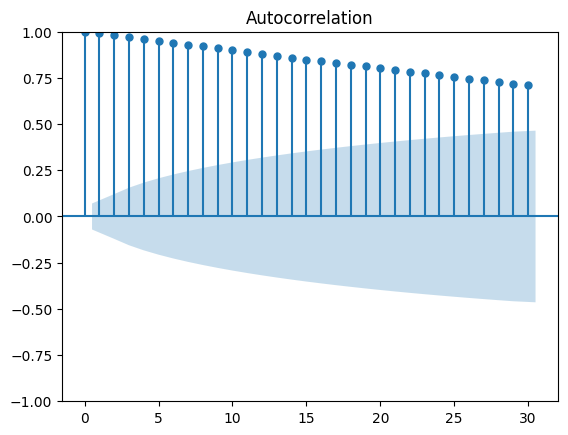

In [ ]:
# Verificar autocorrelação e correlação entre features
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelação do Ibovespa
plot_acf(ibov['Ibovespa'].dropna(), lags=30)
plt.show()

# Interpretação

# - Eixo X (lags): representa o número de dias de defasagem. Lag 1 = ontem, Lag 2 = anteontem, etc.
# - Eixo Y: mostra o grau de correlação entre o valor atual e o valor defasado. Vai de -1 a +1.
# - Barra em Lag 0: sempre é 1.0, pois o valor está sendo comparado com ele mesmo.
# - Barras fora da faixa azul: são estatisticamente significativas. Indicam que há dependência temporal real.
# - Barras dentro da faixa azul: são estatisticamente insignificantes. Podem ser ruído

# - Os primeiros lags (1, 2, 3…) têm autocorrelação alta e positiva, o que indica persistência: o IBOVESPA tende a seguir a direção dos dias anteriores.
# - A autocorrelação vai diminuindo gradualmente, o que é típico de séries financeiras com tendência.
# - Isso sugere que incluir variáveis defasadas (como Ibovespa_t-1, ret_ibov_t-1) pode ajudar o modelo a capturar padrões temporais.
# - Logo, testar modelos que lidam bem com dependência temporal, como árvores de decisão, XGBoost.




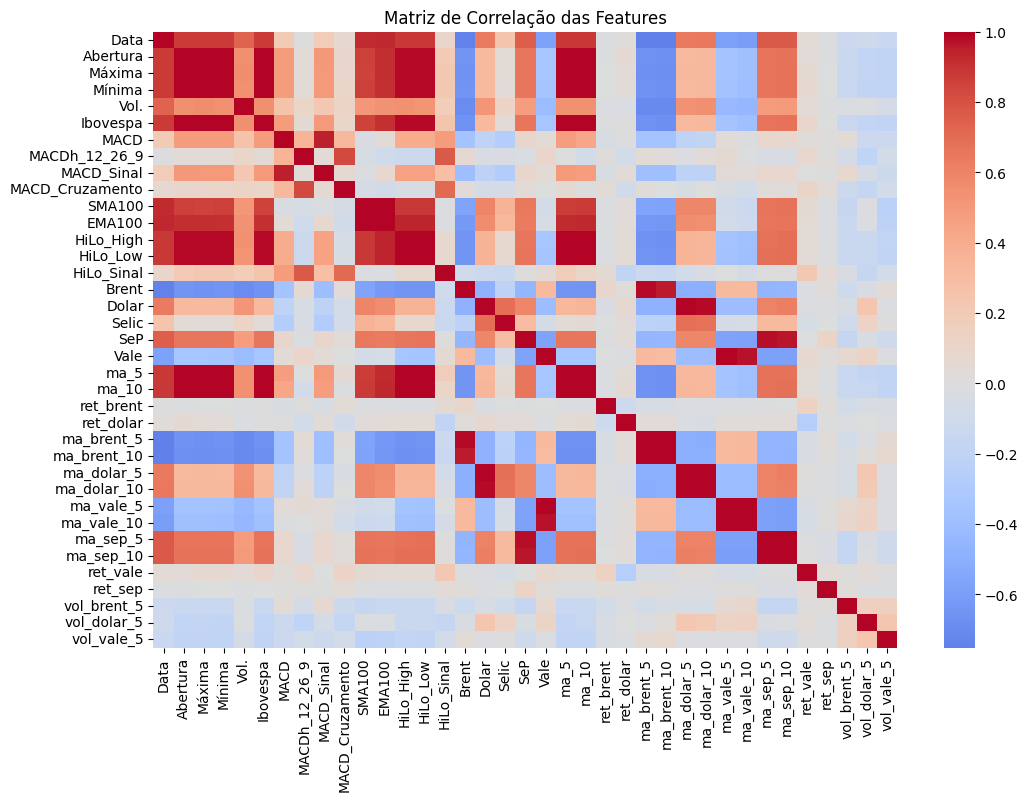

In [ ]:
# Correlação entre variáveis explicativas
corr = ibov.drop(columns=['ibov_alta']).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação das Features")
plt.show()


In [ ]:
# Identificar pares altamente correlacionados

corr_matrix = ibov.corr()

# Definir o limiar (ex: 0.7)
threshold = 0.7
correlated_pairs = []

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j:
            if abs(corr_matrix.loc[i,j]) > threshold:
                correlated_pairs.append((i, j, corr_matrix.loc[i,j]))

# Remover duplicados (i,j) e (j,i)
unique_pairs = []
seen = set()
for i, j, val in correlated_pairs:
    if (j,i) not in seen:
        unique_pairs.append((i,j,val))
        seen.add((i,j))

# Printar os pares correlacionados
print("Variáveis altamente correlacionadas (>|0.7|):")
for i, j, val in unique_pairs:
    print(f"{i} - {j}: {val:.2f}")


Variáveis altamente correlacionadas (>|0.7|):
Data - Abertura: 0.88
Data - Máxima: 0.88
Data - Mínima: 0.88
Data - Vol.: 0.74
Data - Ibovespa: 0.88
Data - SMA100: 0.92
Data - EMA100: 0.93
Data - HiLo_High: 0.88
Data - HiLo_Low: 0.88
Data - Brent: -0.74
Data - SeP: 0.75
Data - ma_5: 0.88
Data - ma_10: 0.88
Data - ma_brent_5: -0.75
Data - ma_brent_10: -0.75
Data - ma_sep_5: 0.76
Data - ma_sep_10: 0.77
Abertura - Máxima: 1.00
Abertura - Mínima: 1.00
Abertura - Ibovespa: 1.00
Abertura - SMA100: 0.86
Abertura - EMA100: 0.91
Abertura - HiLo_High: 0.99
Abertura - HiLo_Low: 0.99
Abertura - ma_5: 1.00
Abertura - ma_10: 0.99
Máxima - Mínima: 1.00
Máxima - Ibovespa: 1.00
Máxima - SMA100: 0.86
Máxima - EMA100: 0.91
Máxima - HiLo_High: 0.98
Máxima - HiLo_Low: 0.98
Máxima - ma_5: 1.00
Máxima - ma_10: 0.99
Mínima - Ibovespa: 1.00
Mínima - SMA100: 0.86
Mínima - EMA100: 0.91
Mínima - HiLo_High: 0.98
Mínima - HiLo_Low: 0.98
Mínima - ma_5: 1.00
Mínima - ma_10: 0.99
Vol. - ma_brent_5: -0.70
Vol. - ma_bren

In [ ]:


# # Definir as variáveis de entrada (X) e a variável alvo (y)
# # X são as colunas que vamos usar para prever o comportamento do Ibovespa

# X = ibov[[
#     "Abertura", "Máxima", "Mínima", "Vol.", "Ibovespa", "Var",
#     "Brent", "Dolar", "Selic", "SeP", "Vale",
#     "ret_ibov", "ret_brent", "ret_dolar", "ret_vale", "ret_sep",
#     "vol_ibov_5", "vol_brent_5", "vol_dolar_5", "vol_vale_5"
# ]]

# # y é a variável que queremos prever: 1 se o Ibovespa subiu, 0 se caiu
# y = ibov["ibov_alta"]

# # Dividir os dados em treino e teste
# # Usamos todos os dias menos os últimos 30 para treinar, e os últimos 30 para testar
# X_train = X.iloc[:-30]
# X_test = X.iloc[-30:]
# y_train = y.iloc[:-30]
# y_test = y.iloc[-30:]

# # Criar e treinar o modelo de Random Forest
# # Esse modelo é bom para dados tabulares e não precisa de normalização
# modelo = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
# modelo.fit(X_train, y_train)

# # Previsões no conjunto de teste
# y_pred = modelo.predict(X_test)



In [ ]:
# # Avaliação do desempenho do modelo
# acuracia = accuracy_score(y_test, y_pred)
# print("🔍 Acurácia no último mês (30 dias):", round(acuracia * 100, 2), "%")
# print("\n📊 Relatório de classificação:")
# print(classification_report(y_test, y_pred))

# # Quais variáveis mais influenciaram o modelo
# print("\n📌 Importância das variáveis:")
# importancias = modelo.feature_importances_
# for nome, valor in zip(X.columns, importancias):
#     print(f"{nome}: {round(valor, 4)}")

In [ ]:
# Remover todos os dados a partir do mês 10. Do dia 22-10 a 11-11 tivemos a maior alta do ibovesp consecutiva nos ultimos 15 anos

remover_dados = (ibov['Data'] >= '22-10-2025') & (ibov['Data'] <= '11-11-2025')
ibov = ibov[~ remover_dados]
ibov.info()


<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 773
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             759 non-null    datetime64[ns]
 1   Abertura         759 non-null    float64       
 2   Máxima           759 non-null    float64       
 3   Mínima           759 non-null    float64       
 4   Vol.             759 non-null    float64       
 5   Ibovespa         759 non-null    float64       
 6   MACD             734 non-null    float64       
 7   MACDh_12_26_9    726 non-null    float64       
 8   MACD_Sinal       726 non-null    float64       
 9   MACD_Cruzamento  759 non-null    int64         
 10  SMA100           660 non-null    float64       
 11  EMA100           660 non-null    float64       
 12  HiLo_High        747 non-null    float64       
 13  HiLo_Low         747 non-null    float64       
 14  HiLo_Sinal       759 non-null    int64         

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# 1. Primeiro, prepare os dados
# Usar apenas features disponíveis ANTES do fechamento
X = ibov[[
    "Abertura", "Mínima", "Vol.",
    "Brent", "Dolar", "Vale",
    "vol_brent_5", "vol_dolar_5", "vol_vale_5",
    "ma_5", "ma_10", "ma_brent_5", "ma_brent_10",
    "ma_dolar_5", "ma_dolar_10", "ma_vale_5", "ma_vale_10"
]]

y = ibov["ibov_alta"]

# 2. Remover linhas com NaN
df_clean = pd.concat([X, y], axis=1).dropna().reset_index(drop = True)
X_clean = df_clean[X.columns]
y_clean = df_clean["ibov_alta"]
df_clean.info()

print(f"📊 Total de dados limpos: {len(X_clean)} observações")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Abertura     750 non-null    float64
 1   Mínima       750 non-null    float64
 2   Vol.         750 non-null    float64
 3   Brent        750 non-null    float64
 4   Dolar        750 non-null    float64
 5   Vale         750 non-null    float64
 6   vol_brent_5  750 non-null    float64
 7   vol_dolar_5  750 non-null    float64
 8   vol_vale_5   750 non-null    float64
 9   ma_5         750 non-null    float64
 10  ma_10        750 non-null    float64
 11  ma_brent_5   750 non-null    float64
 12  ma_brent_10  750 non-null    float64
 13  ma_dolar_5   750 non-null    float64
 14  ma_dolar_10  750 non-null    float64
 15  ma_vale_5    750 non-null    float64
 16  ma_vale_10   750 non-null    float64
 17  ibov_alta    750 non-null    int64  
dtypes: float64(17), int64(1)
memory usage: 105.6 KB
📊 

In [ ]:


# 3. SEPARAÇÃO TEMPORAL ESPECÍFICA
# Últimos 30 dias para teste, 10% dos restantes para validação, resto para treino

# Definir tamanhos
test_size = 30  # Últimos 30 dias para teste
remaining_size = len(X_clean) - test_size
val_size = int(remaining_size * 0.1)  # 10% do restante para validação
train_size = remaining_size - val_size  # Resto para treino

print(f"\n📈 Divisão dos dados:")
print(f"Treino: {train_size} observações ({train_size/len(X_clean):.1%})")
print(f"Validação: {val_size} observações ({val_size/len(X_clean):.1%})")
print(f"Teste (últimos 30 dias): {test_size} observações ({test_size/len(X_clean):.1%})")

# Verificar se temos dados suficientes
if len(X_clean) < 100:
    print(f"\n⚠️  AVISO: Poucos dados disponíveis ({len(X_clean)}). Considere aumentar a base de dados.")



📈 Divisão dos dados:
Treino: 648 observações (86.4%)
Validação: 72 observações (9.6%)
Teste (últimos 30 dias): 30 observações (4.0%)


In [ ]:

# Separar os dados (manter ordem temporal!)
# 1. Primeiro separar os últimos 30 dias (TESTE)
X_test = X_clean.iloc[-test_size:]
y_test = y_clean.iloc[-test_size:]

# 2. Dos dados restantes, separar validação (últimos 10% antes do teste)
X_train_val = X_clean.iloc[:-test_size]
y_train_val = y_clean.iloc[:-test_size]

# Separar validação dos dados restantes
X_val = X_train_val.iloc[-val_size:]
y_val = y_train_val.iloc[-val_size:]

# 3. O que sobra é o treino
X_train = X_train_val.iloc[:-val_size]
y_train = y_train_val.iloc[:-val_size]

# 4. Verificar as datas (se seu dataframe tiver coluna de data)
if 'Data' in ibov.columns:
    dates = ibov['Data'].iloc[df_clean.index]  # Pegar apenas as datas que não foram removidas
    print(f"\n📅 Períodos:")
    print(f"Treino: {dates.iloc[0].date()} a {dates.iloc[train_size-1].date()}")
    print(f"Validação: {dates.iloc[train_size].date()} a {dates.iloc[train_size+val_size-1].date()}")
    print(f"Teste: {dates.iloc[-test_size].date()} a {dates.iloc[-1].date()}")

# 5. Criar e treinar o modelo
print("\n🚀 Treinando o modelo...")
modelo = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

# 6. Validação cruzada nos dados de TREINO
print("\n🔍 Validação Cruzada (5 folds)...")
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média na validação cruzada: {scores.mean():.2%}")
print(f"Desvio padrão: {scores.std():.2%}")

# 7. Treinar com todos os dados de treino
modelo.fit(X_train, y_train)

# 8. Avaliar no conjunto de VALIDAÇÃO (para ajuste de hiperparâmetros)
print(f"\n📊 Desempenho na VALIDAÇÃO ({len(y_val)} dias):")
y_pred_val = modelo.predict(X_val)
print(f"Acurácia: {accuracy_score(y_val, y_pred_val):.2%}")
print("Relatório de classificação (VALIDAÇÃO):")
print(classification_report(y_val, y_pred_val))

# 9. Importância das features (baseado no treino)
importancias = pd.DataFrame({
    'Feature': X.columns,
    'Importância': modelo.feature_importances_
}).sort_values('Importância', ascending=False)

print(f"\n🎯 Top 10 Features mais importantes:")
print(importancias.head(10).to_string(index=False))

# 10. Distribuição das classes
print(f"\n📈 Distribuição das classes:")
print(f"Treino      - Alta: {(y_train == 1).sum()} ({y_train.mean():.1%}), Baixa: {(y_train == 0).sum()} ({1-y_train.mean():.1%})")
print(f"Validação   - Alta: {(y_val == 1).sum()} ({y_val.mean():.1%}), Baixa: {(y_val == 0).sum()} ({1-y_val.mean():.1%})")
print(f"Teste       - Alta: {(y_test == 1).sum()} ({y_test.mean():.1%}), Baixa: {(y_test == 0).sum()} ({1-y_test.mean():.1%})")

# 11. AVALIAÇÃO FINAL NO TESTE (últimos 30 dias)
print("\n" + "="*60)
print("🎯 AVALIAÇÃO FINAL NO CONJUNTO DE TESTE (ÚLTIMOS 30 DIAS)")
print("="*60)

# IMPORTANTE: Não re-treinar o modelo com os dados de validação!
# Usar o modelo já treinado apenas com dados de treino
y_pred_test = modelo.predict(X_test)

print(f"\n📊 Desempenho no TESTE ({len(y_test)} dias - últimos 30 dias):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_test):.2%}")
print("\nRelatório de classificação (TESTE - últimos 30 dias):")
print(classification_report(y_test, y_pred_test))

# 12. Matriz de confusão detalhada
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()

print(f"\n📊 Matriz de Confusão (Teste - últimos 30 dias):")
print(f"                 Previsto ↓")
print(f"                 Negativo  Positivo")
print(f"Real → Negativo   {tn:^9} {fp:^9}")
print(f"Real → Positivo   {fn:^9} {tp:^9}")

# 13. Métricas específicas para trading
print(f"\n📈 Métricas específicas para trading:")
print(f"Precisão (acerto quando prevê alta): {tp/(tp+fp):.1%}" if (tp+fp) > 0 else "Precisão: N/A")
print(f"Recall (captura das altas reais): {tp/(tp+fn):.1%}" if (tp+fn) > 0 else "Recall: N/A")
print(f"Especificidade (acerto quando prevê baixa): {tn/(tn+fp):.1%}" if (tn+fp) > 0 else "Especificidade: N/A")

# 14. Comparação de desempenho
print("\n" + "="*60)
print("📋 RESUMO DO DESEMPENHO")
print("="*60)

# Acuracia no treino (para referência)
y_pred_train = modelo.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)

print(f"\nAcurácia no TREINO:    {train_acc:.2%}")
print(f"Acurácia na VALIDAÇÃO: {accuracy_score(y_val, y_pred_val):.2%}")
print(f"Acurácia no TESTE:     {accuracy_score(y_test, y_pred_test):.2%}")

# Diferença entre treino e teste (indica overfitting)
overfit_gap = train_acc - accuracy_score(y_test, y_pred_test)
print(f"\n🔍 Diferença Treino-Teste: {overfit_gap:.2%}")

if overfit_gap > 0.15:
    print("⚠️  ATENÇÃO: Possível overfitting significativo (diferença > 15%)")
elif overfit_gap > 0.10:
    print("⚠️  Cuidado: Pode haver overfitting (diferença > 10%)")
else:
    print("✅ Diferença aceitável entre treino e teste")

# 15. Opcional: Salvar resultados para análise posterior
resultados = pd.DataFrame({
    'Data': dates.iloc[-test_size:].values if 'Data' in ibov.columns else [f"Dia {i+1}" for i in range(test_size)],
    'Real': y_test.values,
    'Previsto': y_pred_test
})

print(f"\n💾 Resultados salvos no DataFrame 'resultados'")
print(resultados.head(10))

# 16. Versão alternativa: Treinar com treino + validação para teste final
print("\n" + "="*60)
print("🔄 TREINAMENTO COM TREINO + VALIDAÇÃO PARA TESTE FINAL")
print("="*60)

# Opcional: Treinar com todos os dados exceto teste para melhor performance
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

modelo_full = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

modelo_full.fit(X_train_full, y_train_full)
y_pred_test_full = modelo_full.predict(X_test)

print(f"\n📊 Desempenho no TESTE (modelo treinado com treino+validação):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_test_full):.2%}")
print("Relatório de classificação:")
print(classification_report(y_test, y_pred_test_full))


📅 Períodos:
Treino: 2022-11-16 a 2025-06-23
Validação: 2025-06-24 a 2025-10-01
Teste: 2025-10-02 a 2025-12-04

🚀 Treinando o modelo...

🔍 Validação Cruzada (5 folds)...
Acurácia média na validação cruzada: 48.30%
Desvio padrão: 3.57%

📊 Desempenho na VALIDAÇÃO (72 dias):
Acurácia: 51.39%
Relatório de classificação (VALIDAÇÃO):
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        38
           1       0.48      0.44      0.46        34

    accuracy                           0.51        72
   macro avg       0.51      0.51      0.51        72
weighted avg       0.51      0.51      0.51        72


🎯 Top 10 Features mais importantes:
    Feature  Importância
 vol_vale_5     0.096936
ma_brent_10     0.079412
vol_dolar_5     0.076713
vol_brent_5     0.069244
       Vol.     0.063015
      Dolar     0.061258
 ma_brent_5     0.059575
ma_dolar_10     0.056667
      Brent     0.055312
     Mínima     0.054697

📈 Distribuição das classes:
Tr

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

# ==================== 1. VERIFICAÇÃO INICIAL DOS DADOS ====================
print("🔍 ANALISANDO QUALIDADE DOS DADOS")
print("="*60)

# Verificar valores nulos
print("1. Valores nulos por coluna:")
print(ibov.isnull().sum().sort_values(ascending=False).head(20))

# Verificar correlação com target (apenas para análise)
if 'ibov_alta' in ibov.columns:
    print(f"\n2. Correlação das features com ibov_alta:")
    correlations = ibov.corr()['ibov_alta'].abs().sort_values(ascending=False)
    print(correlations.head(15))

# ==================== 2. REMOVER PERÍODO ATÍPICO (22/10 a 11/11) ====================
print(f"\n🚨 REMOVENDO PERÍODO ATÍPICO (alta histórica)")
print("="*60)

if 'Data' in ibov.columns:
    ibov['Data'] = pd.to_datetime(ibov['Data'])
    mask_atipico = (ibov['Data'] >= '2023-10-22') & (ibov['Data'] <= '2023-11-11')
    ibov = ibov[~mask_atipico].copy()
    print(f"Período atípico removido: 22/10/2023 a 11/11/2023")
    print(f"Dados restantes: {len(ibov)} observações")
else:
    print("⚠️  Coluna 'Data' não encontrada - não foi possível remover período atípico")

# ==================== 3. ENGENHARIA DE FEATURES MELHORADA ====================
print(f"\n🔧 CRIANDO FEATURES MAIS RELEVANTES")
print("="*60)

# Criar cópia para não modificar original
ibov_processed = ibov.copy()

# FEATURES BÁSICAS (disponíveis antes do fechamento)
features = [
    # Preços do dia
    "Abertura", "Mínima", "Vol.",

    # Ativos correlacionados
    "Brent", "Dolar", "SeP", "Vale",

    # Médias móveis (técnicas)
    "ma_5", "ma_10",
    "ma_brent_5", "ma_brent_10",
    "ma_dolar_5", "ma_dolar_10",
    "ma_vale_5", "ma_vale_10",

    # Volatilidade
    "vol_brent_5", "vol_dolar_5", "vol_vale_5",
]

# NOVAS FEATURES CRIADAS
print("Criando novas features...")

# 1. RSI simplificado (força relativa)
if all(col in ibov_processed.columns for col in ["Abertura", "Mínima", "Ibovespa"]):
    ibov_processed['range_diario'] = (ibov_processed["Ibovespa"] - ibov_processed["Mínima"]) / (ibov_processed["Abertura"] - ibov_processed["Mínima"] + 1e-10)
    features.append('range_diario')

# 2. Gap de abertura
if "Abertura" in ibov_processed.columns and "Ibovespa" in ibov_processed.columns:
    ibov_processed['gap_abertura'] = (ibov_processed["Abertura"] - ibov_processed["Ibovespa"].shift(1)) / ibov_processed["Ibovespa"].shift(1)
    features.append('gap_abertura')

# 3. Tendência de curto prazo
if "ma_5" in ibov_processed.columns and "ma_10" in ibov_processed.columns:
    ibov_processed['tendencia_curta'] = (ibov_processed["ma_5"] > ibov_processed["ma_10"]).astype(int)
    features.append('tendencia_curta')

# 4. Volume relativo
if "Vol." in ibov_processed.columns:
    ibov_processed['vol_relativo'] = ibov_processed["Vol."] / ibov_processed["Vol."].rolling(20, min_periods=5).mean()
    features.append('vol_relativo')

# 5. Spread Brent-Dolar
if "Brent" in ibov_processed.columns and "Dolar" in ibov_processed.columns:
    ibov_processed['brent_dolar_ratio'] = ibov_processed["Brent"] / (ibov_processed["Dolar"] + 1e-10)
    features.append('brent_dolar_ratio')

print(f"Total de features: {len(features)}")
print(f"Features selecionadas: {features}")

# ==================== 4. PREPARAR DADOS ====================
print(f"\n📊 PREPARANDO DADOS PARA MODELAGEM")
print("="*60)

X = ibov_processed[features].copy()
y = ibov_processed["ibov_alta"]

# Remover NaN e resetar índice
data_clean = pd.concat([X, y], axis=1).dropna().reset_index(drop=True)
X_clean = data_clean[features]
y_clean = data_clean["ibov_alta"]

print(f"Dados limpos: {len(X_clean)} observações")
print(f"Proporção de altas: {y_clean.mean():.2%}")

# ==================== 5. SEPARAÇÃO TEMPORAL ====================
test_size = 30
if len(X_clean) < test_size + 100:
    test_size = min(20, int(len(X_clean) * 0.15))
    print(f"⚠️  Poucos dados. Teste ajustado para {test_size} dias")

remaining = len(X_clean) - test_size
val_size = int(remaining * 0.1)
train_size = remaining - val_size

print(f"\n📈 Divisão temporal:")
print(f"Treino: {train_size} dias ({train_size/len(X_clean):.1%})")
print(f"Validação: {val_size} dias ({val_size/len(X_clean):.1%})")
print(f"Teste: {test_size} dias ({test_size/len(X_clean):.1%})")

# Separar
X_test = X_clean.iloc[-test_size:]
y_test = y_clean.iloc[-test_size:]

X_train_val = X_clean.iloc[:-test_size]
y_train_val = y_clean.iloc[:-test_size]

X_val = X_train_val.iloc[-val_size:]
y_val = y_train_val.iloc[-val_size:]

X_train = X_train_val.iloc[:-val_size]
y_train = y_train_val.iloc[:-val_size]

# ==================== 6. VALIDAÇÃO CRUZADA TEMPORAL ====================
print(f"\n🔍 VALIDAÇÃO CRUZADA TEMPORAL")
print("="*60)

tscv = TimeSeriesSplit(n_splits=5)
cv_scores = []
feature_importances = []

for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):
    X_tr = X_train.iloc[train_idx]
    X_v = X_train.iloc[val_idx]
    y_tr = y_train.iloc[train_idx]
    y_v = y_train.iloc[val_idx]

    model_cv = RandomForestClassifier(
        n_estimators=100,
        max_depth=4,  # Mais raso para evitar overfitting
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=42 + fold
    )

    model_cv.fit(X_tr, y_tr)
    score = model_cv.score(X_v, y_v)
    cv_scores.append(score)

    # Coletar importâncias médias
    if fold == 1:
        feature_importances = model_cv.feature_importances_
    else:
        feature_importances += model_cv.feature_importances_

    print(f"Fold {fold}: {score:.2%} (Treino: {len(X_tr)}, Val: {len(X_v)})")

feature_importances /= 5  # Média entre os folds
print(f"\n📊 CV Score: {np.mean(cv_scores):.2%} ± {np.std(cv_scores):.2%}")

# ==================== 7. SELEÇÃO DE FEATURES BASEADA NA IMPORTÂNCIA ====================
print(f"\n🎯 SELEÇÃO DAS MELHORES FEATURES")
print("="*60)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("Top 15 features por importância:")
print(importance_df.head(15).to_string(index=False))

# Selecionar apenas features com importância > 1%
good_features = importance_df[importance_df['Importance'] > 0.01]['Feature'].tolist()
print(f"\nSelecionando {len(good_features)} features com importância > 1%")

# Atualizar conjuntos de dados com melhores features
X_train_best = X_train[good_features]
X_val_best = X_val[good_features]
X_test_best = X_test[good_features]

# ==================== 8. TREINAMENTO DO MODELO FINAL ====================
print(f"\n🚀 TREINANDO MODELO FINAL")
print("="*60)

# Modelo otimizado
model_final = RandomForestClassifier(
    n_estimators=150,
    max_depth=4,
    min_samples_split=15,
    min_samples_leaf=8,
    max_features='sqrt',  # Limitar features por árvore
    class_weight='balanced',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Treinar com melhores features
model_final.fit(X_train_best, y_train)

# Avaliar na validação
y_pred_val = model_final.predict(X_val_best)
y_proba_val = model_final.predict_proba(X_val_best)[:, 1]

print(f"📊 DESEMPENHO NA VALIDAÇÃO:")
print(f"Acurácia: {accuracy_score(y_val, y_pred_val):.2%}")
print(f"AUC-ROC: {roc_auc_score(y_val, y_proba_val):.2%}")
print("\nRelatório detalhado:")
print(classification_report(y_val, y_pred_val))

# ==================== 9. AVALIAÇÃO NO TESTE ====================
print(f"\n" + "="*60)
print(f"🎯 AVALIAÇÃO FINAL NO TESTE (ÚLTIMOS {test_size} DIAS)")
print("="*60)

y_pred_test = model_final.predict(X_test_best)
y_proba_test = model_final.predict_proba(X_test_best)[:, 1]

print(f"📊 DESEMPENHO NO TESTE:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_test):.2%}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_test):.2%}")

print("\n📋 RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()

print(f"\n🎯 MATRIZ DE CONFUSÃO:")
print(f"                 Previsto")
print(f"                ─────┬─────")
print(f"               │ 0   │  1  ")
print(f"Real ──────────┼─────┼─────")
print(f"     0 (Baixa) │ {tn:3d} │ {fp:3d}")
print(f"     1 (Alta)  │ {fn:3d} │ {tp:3d}")
print(f"                └─────┴─────")

# Métricas de trading
if tp + fp > 0:
    precision = tp / (tp + fp)
    print(f"\n💰 MÉTRICAS PARA TRADING:")
    print(f"Precisão (acerto nas compras): {precision:.1%}")

    # Simulação simples de estratégia
    if precision > 0.55:
        print(f"✅ Estratégia POTENCIALMENTE lucrativa")
        # Retorno esperado se comprar apenas quando modelo prevê alta
        total_trades = tp + fp
        win_rate = tp / total_trades if total_trades > 0 else 0
        print(f"   Win Rate: {win_rate:.1%}")
        print(f"   Trades totais: {total_trades}")
    else:
        print(f"❌ Estratégia NÃO recomendada (precisão < 55%)")

# ==================== 10. ANÁLISE DE OVERFITTING ====================
print(f"\n🔍 ANÁLISE DE OVERFITTING")
print("="*60)

y_pred_train = model_final.predict(X_train_best)
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
overfit_gap = train_acc - test_acc

print(f"Acurácia Treino: {train_acc:.2%}")
print(f"Acurácia Teste:  {test_acc:.2%}")
print(f"Diferença:       {overfit_gap:+.2%}")

if overfit_gap > 0.10:
    print("⚠️  OVERFITTING SIGNIFICATIVO - modelo muito complexo")
elif overfit_gap > 0.05:
    print("⚠️  Leve overfitting - considerar simplificar modelo")
else:
    print("✅ Overfitting controlado")

# ==================== 11. MODELO ALTERNATIVO: SIMPLES ====================
print(f"\n🔄 TESTANDO MODELO SIMPLES (benchmark)")
print("="*60)

# Modelo simples como benchmark
from sklearn.dummy import DummyClassifier

benchmark = DummyClassifier(strategy='stratified', random_state=42)
benchmark.fit(X_train_best, y_train)
y_pred_bench = benchmark.predict(X_test_best)
bench_acc = accuracy_score(y_test, y_pred_bench)

print(f"Acurácia do benchmark (aleatório estratificado): {bench_acc:.2%}")
print(f"Seu modelo vs benchmark: {test_acc - bench_acc:+.2%}")

if test_acc > bench_acc + 0.05:
    print("✅ Seu modelo é melhor que o aleatório")
else:
    print("❌ Seu modelo não é melhor que aleatório - REVISAR ABORDAGEM")

# ==================== 12. SUGESTÕES DE MELHORIA ====================
print(f"\n💡 SUGESTÕES PARA MELHORAR O MODELO")
print("="*60)

if test_acc < 0.55:
    print("1. 🚨 PROBLEMAS CRÍTICOS DETECTADOS:")
    print("   • Performance abaixo de 55% indica que o modelo não é útil")
    print("   • Possíveis causas:")
    print("     a) Vazamento de dados (revisar features)")
    print("     b) Features sem poder preditivo")
    print("     c) Mudança estrutural no mercado")

    print("\n2. 🔧 AÇÕES RECOMENDADAS:")
    print("   • Adicionar features defasadas (lag features)")
    print("   • Experimentar outros modelos (XGBoost, LightGBM)")
    print("   • Adicionar dados macroeconômicos")
    print("   • Considerar problema de regressão em vez de classificação")

    print("\n3. 📈 FEATURES SUGERIDAS:")
    print("   • Retornos defasados (lag 1, 2, 5 dias)")
    print("   • Volatilidade histórica (20 dias)")
    print("   • Indicadores de momento (ROCs)")
    print("   • Dados de sentimento do mercado")
    print("   • Indicadores de volume (OBV, etc.)")

# ==================== 13. RESULTADOS DETALHADOS ====================
print(f"\n📊 RESULTADOS DETALHADOS")
print("="*60)

results_df = pd.DataFrame({
    'Data': ibov_processed['Data'].iloc[-test_size:].values if 'Data' in ibov_processed.columns else [f'Dia {i+1}' for i in range(test_size)],
    'Real': y_test.values,
    'Previsto': y_pred_test,
    'Prob_Alta': y_proba_test,
    'Acertou': y_test.values == y_pred_test
})

print("Últimas 10 previsões:")
print(results_df.tail(10).to_string(index=False))

# Estatísticas
accuracy_series = results_df['Acertou'].expanding(min_periods=5).mean()
print(f"\n📈 Evolução da acurácia acumulada:")
for i in [5, 10, 15, len(results_df)]:
    if i <= len(results_df):
        print(f"  Primeiros {i} dias: {accuracy_series.iloc[i-1]:.1%}")

print(f"\n✅ ANÁLISE CONCLUÍDA")
print(f"Acurácia final: {test_acc:.2%}")
print(f"Status: {'ÚTIL' if test_acc > 0.55 else 'NÃO ÚTIL'}")

🔍 ANALISANDO QUALIDADE DOS DADOS
1. Valores nulos por coluna:
SMA100           99
EMA100           99
MACD_Sinal       33
MACDh_12_26_9    33
MACD             25
HiLo_High        12
HiLo_Low         12
ma_dolar_10       9
ma_vale_10        9
ma_sep_10         9
ma_brent_10       9
ma_10             9
vol_vale_5        5
vol_brent_5       5
vol_dolar_5       5
ma_sep_5          4
ma_brent_5        4
ma_dolar_5        4
ma_vale_5         4
ma_5              4
dtype: int64

2. Correlação das features com ibov_alta:
ibov_alta          1.000000
vol_vale_5         0.060373
vol_dolar_5        0.052228
Brent              0.051229
ma_brent_5         0.049208
vol_brent_5        0.046192
ma_brent_10        0.044432
MACD_Cruzamento    0.043919
ma_dolar_5         0.042091
ma_dolar_10        0.040471
Dolar              0.037934
ma_sep_10          0.037476
ma_sep_5           0.036858
ma_vale_10         0.034245
Vale               0.033345
Name: ibov_alta, dtype: float64

🚨 REMOVENDO PERÍODO ATÍPICO (

In [ ]:
# ==================== 1. LAG FEATURES ====================
lags = [1, 2, 3, 5, 10]

for lag in lags:
    ibov_processed[f'ibov_ret_lag_{lag}'] = ibov_processed['Ibovespa'].pct_change(lag)
    ibov_processed[f'brent_ret_lag_{lag}'] = ibov_processed['Brent'].pct_change(lag)
    ibov_processed[f'dolar_ret_lag_{lag}'] = ibov_processed['Dolar'].pct_change(lag)
    ibov_processed[f'vale_ret_lag_{lag}'] = ibov_processed['Vale'].pct_change(lag)

lag_features = [c for c in ibov_processed.columns if 'ret_lag_' in c]
features = list(set(features + lag_features))


In [ ]:
# ==================== 2. DATA PREP ====================
X = ibov_processed[features]
y = ibov_processed['ibov_alta']

data = pd.concat([X, y], axis=1).dropna().reset_index(drop=True)
X = data[features]
y = data['ibov_alta']

print(f"Observations after lags: {len(X)}")
print(f"Positive class rate: {y.mean():.2%}")


Observations after lags: 735
Positive class rate: 50.20%


In [ ]:
# ==================== 3. TIME SPLIT ====================
test_size = 30
val_size = int(0.1 * (len(X) - test_size))

X_test = X.iloc[-test_size:]
y_test = y.iloc[-test_size:]

X_train_val = X.iloc[:-test_size]
y_train_val = y.iloc[:-test_size]

X_val = X_train_val.iloc[-val_size:]
y_val = y_train_val.iloc[-val_size:]

X_train = X_train_val.iloc[:-val_size]
y_train = y_train_val.iloc[:-val_size]

print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")


Train: 635 | Val: 70 | Test: 30


In [ ]:
# ==================== 4. MODEL ====================
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=10,
    gamma=0.1,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
# ==================== 5. EVALUATION ====================
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Validation
val_pred = model.predict(X_val)
val_proba = model.predict_proba(X_val)[:, 1]

print("\nVALIDATION RESULTS")
print(f"Accuracy: {accuracy_score(y_val, val_pred):.2%}")
print(f"AUC:      {roc_auc_score(y_val, val_proba):.2%}")
print(classification_report(y_val, val_pred))

# Test
test_pred = model.predict(X_test)
test_proba = model.predict_proba(X_test)[:, 1]

print("\nTEST RESULTS")
print(f"Accuracy: {accuracy_score(y_test, test_pred):.2%}")
print(f"AUC:      {roc_auc_score(y_test, test_proba):.2%}")
print(classification_report(y_test, test_pred))



VALIDATION RESULTS
Accuracy: 60.00%
AUC:      65.69%
              precision    recall  f1-score   support

           0       0.61      0.64      0.62        36
           1       0.59      0.56      0.58        34

    accuracy                           0.60        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.60      0.60      0.60        70


TEST RESULTS
Accuracy: 36.67%
AUC:      37.95%
              precision    recall  f1-score   support

           0       0.38      0.57      0.46        14
           1       0.33      0.19      0.24        16

    accuracy                           0.37        30
   macro avg       0.36      0.38      0.35        30
weighted avg       0.36      0.37      0.34        30



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_pred)
tn, fp, fn, tp = cm.ravel()

precision_up = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_up = tp / (tp + fn) if (tp + fn) > 0 else 0

print("\nTRADING METRICS")
print(f"Precision (buy accuracy): {precision_up:.2%}")
print(f"Recall (missed rallies):  {recall_up:.2%}")
print(f"Total trades: {tp + fp}")



TRADING METRICS
Precision (buy accuracy): 33.33%
Recall (missed rallies):  18.75%
Total trades: 9


In [ ]:
# ==================== 7. THRESHOLD TUNING ====================
thresholds = np.arange(0.5, 0.75, 0.02)

best = []

for t in thresholds:
    preds = (test_proba >= t).astype(int)
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()

    if tp + fp > 10:
        precision = tp / (tp + fp)
        best.append((t, precision, tp + fp))

best_df = pd.DataFrame(best, columns=['Threshold', 'Precision', 'Trades'])
print(best_df.sort_values('Precision', ascending=False).head())


Empty DataFrame
Columns: [Threshold, Precision, Trades]
Index: []


              feature  importance
25        ma_brent_10    0.027974
39     vale_ret_lag_1    0.027659
12       range_diario    0.027592
6   brent_dolar_ratio    0.027300
4            Abertura    0.026894
37    dolar_ret_lag_2    0.026754
29        vol_brent_5    0.026005
34    dolar_ret_lag_1    0.025427
17         vol_vale_5    0.025292
26     ibov_ret_lag_1    0.025149
28    ibov_ret_lag_10    0.025121
38   brent_ret_lag_10    0.024711
32          ma_vale_5    0.024515
5                ma_5    0.024495
41     ibov_ret_lag_2    0.024290
9      ibov_ret_lag_3    0.024130
15     vale_ret_lag_5    0.024125
40                SeP    0.023935
2          ma_brent_5    0.023828
31     vale_ret_lag_3    0.023679
1          ma_vale_10    0.023544
0         ma_dolar_10    0.023322
19    dolar_ret_lag_5    0.023295
36    brent_ret_lag_1    0.023293
18    brent_ret_lag_3    0.023262
7              Mínima    0.023213
3        vol_relativo    0.023185
42       gap_abertura    0.023132
30        vol_

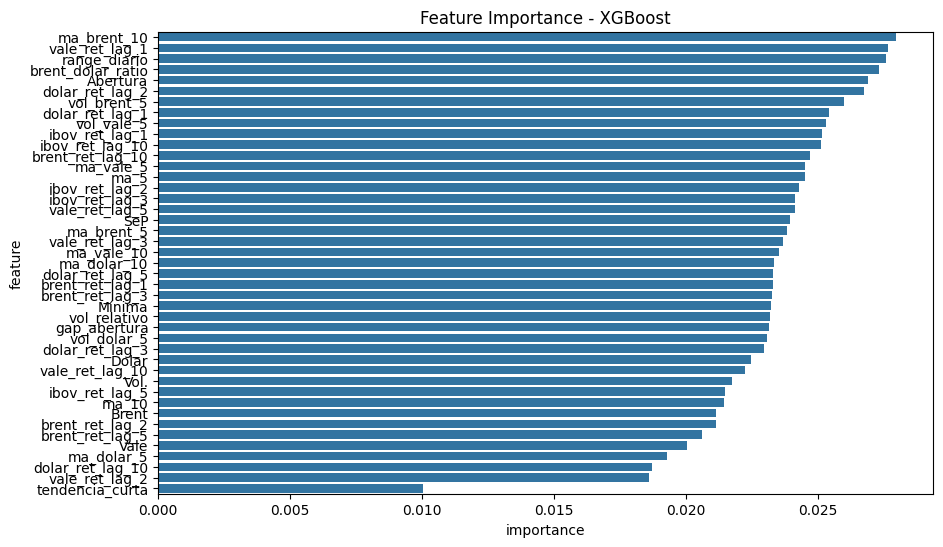

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extrai a importância das variáveis do modelo treinado
importance = model.feature_importances_

# 2. Cria um DataFrame organizado com nome da feature e importância
feat_imp = pd.DataFrame({
    'feature': features,
    'importance': importance
}).sort_values(by='importance', ascending=False)

# 3. Mostra a tabela ordenada
print(feat_imp)

# 4. Plota gráfico de barras para visualizar melhor
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title("Feature Importance - XGBoost")
plt.show()